In [135]:
# from google.colab import drive
# drive.mount('/gdrive')

In [136]:
import tensorflow as tf
import numpy as np

In [137]:
model_path = 'my_model'
model = tf.saved_model.load(model_path)

In [138]:
test_path = "./dog-cat-full-dataset-master/data/test"
IMG_SIZE = 160

test_dataset_no_batch = tf.keras.utils.image_dataset_from_directory(
    test_path, image_size=(IMG_SIZE, IMG_SIZE),
    shuffle=True,seed=20, batch_size=1
)

Found 5000 files belonging to 2 classes.


In [139]:
def format_sample(image, label):
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1
    return image, label


In [167]:
import matplotlib.pyplot as plt

# Create an iterator for the dataset
iterator = iter(test_dataset_no_batch)


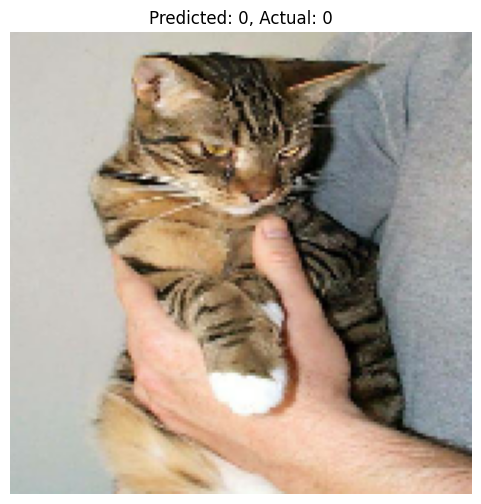

In [215]:

# Retrieve the first batch (which is just one image due to batch_size=1)
images, labels = next(iterator)


# images is a batch of images, even if batch_size=1
# so you get the first image in the batch
image = images[0].numpy()
label = labels[0].numpy()


# Normalizing image data
images, labels = format_sample(images, labels)

# Assuming 'serving_default' is available and appropriate for inference
infer = model.signatures['serving_default']

# The model's input expects a dictionary
predictions = infer(images)['output_0']

class_indexes = tf.argmax(predictions, axis=1).numpy()
# # Plot the image
# remember to denormalize the image before plotting
display_image = ((images[0].numpy() + 1) * 127.5).astype(np.uint8)

plt.figure(figsize=(6, 6))
plt.imshow(display_image)
plt.title(f"Predicted: {class_indexes[0]}, Actual: {labels[0].numpy()}")
plt.axis('off')  # Hide axes for better visibility
plt.show()